<a href="https://colab.research.google.com/github/docherty/deeplearning/blob/master/fastai/dl1/lesson01_concise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
  # set up the environment when first initialising the colab VM
  !curl https://course-v3.fast.ai/setup/colab | bash

In [10]:
from fastai.vision import *
# batch size...only change this if we have memory issues (seems OK at 64)
bs = 64
# Uncomment the following help() if we need to understand more about where data is being stored
# help(untar_data)
# Note: the URLs.PETS variable is specified in the fastai library (/fastai/datasets.py)
path = untar_data(URLs.PETS); path
# path.ls()
path_anno = path/'annotations'
path_img = path/'images'
fnames = get_image_files(path_img)
fnames[:5]
np.random.seed(2)
pat = re.compile(r'/([^/]+)_\d+.jpg$')
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(), size=224, bs=bs).normalize(imagenet_stats)
# shows some images of from the data so we can see what we're working with
data.show_batch(rows=2, figsize=(5,5))
# print the clasification names
print(data.classes)
len(data.classes),data.c

learn = create_cnn(data, models.resnet34, metrics=error_rate)
learn.fit_one_cycle(4)

# Let's see what the classification looks like
interp = ClassificationInterpretation.from_learner(learn)
losses,idxs = interp.top_losses()
len(data.valid_ds)==len(losses)==len(idxs)
# Plot the most erroneous classifications
interp.plot_top_losses(9, figsize=(15,11))
# doc(interp.plot_top_losses)
#interp.plot_confusion_matrix(figsize=(16,16), dpi=60)

['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British_Shorthair', 'Egyptian_Mau', 'Maine_Coon', 'Persian', 'Ragdoll', 'Russian_Blue', 'Siamese', 'Sphynx', 'american_bulldog', 'american_pit_bull_terrier', 'basset_hound', 'beagle', 'boxer', 'chihuahua', 'english_cocker_spaniel', 'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese', 'japanese_chin', 'keeshond', 'leonberger', 'miniature_pinscher', 'newfoundland', 'pomeranian', 'pug', 'saint_bernard', 'samoyed', 'scottish_terrier', 'shiba_inu', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier']


epoch,train_loss,valid_loss,error_rate
1,0.854634,0.365582,0.122463


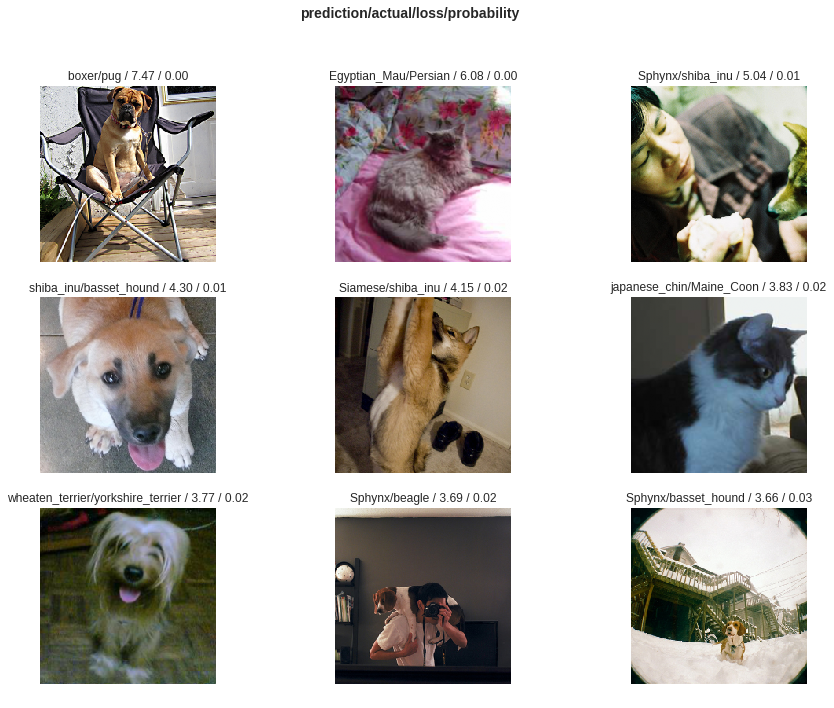